In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [3]:
data = np.array([[3,4],[2,8],[6,9],[10,12]])

In [4]:
df = pd.DataFrame(data, columns=["col1","col2"])

In [5]:
df

,col1,col2
0,3,4
1,2,8
2,6,9
3,10,12


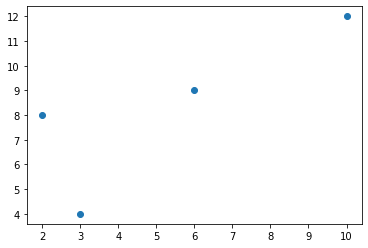

In [6]:
plt.scatter(df["col1"],df["col2"])

In [ ]:
# 1. Standardization
# 2. cov matrix
# 3. Eigan values and Eigan vector
# 4. Principal component

In [10]:
mean = np.mean(df,axis=0)
sd = np.std(df,axis=0)

In [14]:
scaled_df = (df - mean) / sd
scaled_df

,col1,col2
0,-0.722897,-1.485297
1,-1.044185,-0.087370
2,0.240966,0.262111
3,1.526117,1.310556


In [19]:
# Covariance Matrix
cov_matix = np.cov(scaled_df.T)

In [22]:
# Step 3 eigan value and eigan vector
eigan_value, eigan_vector = np.linalg.eig(cov_matix)

In [23]:
eigan_value

array([2.40938985, 0.25727682])

In [24]:
eigan_vector

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [25]:
# We are getting PC1 and PC2
eigan_vector.T.dot(scaled_df.T).T

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [26]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA()

In [30]:
pd.DataFrame(pca.fit_transform(scaled_df), columns=["PC1","PC2"])

,PC1,PC2
0,-1.561429,-0.539098
1,-0.800131,0.676570
2,0.355729,0.014952
3,2.005831,-0.152424


In [33]:
pca.inverse_transform(pca.fit_transform(scaled_df))

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [34]:
pca.explained_variance_ratio_

array([0.90352119, 0.09647881])

In [35]:
df = pd.read_csv("https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv")

In [36]:
df.sample(5)

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
102,103,1.51820,12.62,2.76,0.83,73.81,0.35,9.42,0.00,0.2,2
180,181,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.00,0.0,6
204,205,1.51617,14.95,0.00,2.27,73.30,0.00,8.71,0.67,0.0,7
38,39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.0,1
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [38]:
set(df["Type of glass"])

{1, 2, 3, 5, 6, 7}

In [44]:
df = df.drop(columns=["Id number","Type of glass"])

In [46]:
df.sample(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
63,1.52227,14.17,3.81,0.78,71.35,0.00,9.69,0.00,0.00
52,1.51808,13.43,2.87,1.19,72.84,0.55,9.03,0.00,0.00
174,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51
57,1.51824,12.87,3.48,1.29,72.95,0.60,8.43,0.00,0.00
42,1.51779,13.21,3.39,1.33,72.76,0.59,8.59,0.00,0.00


In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scale = StandardScaler()

In [54]:
df_scaled = pd.DataFrame(scale.fit_transform(df), columns=df.columns)

In [56]:
 pd.DataFrame(pca.fit_transform(df_scaled))

,0,1,2,3,4,5,6,7,8
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,-0.395600,-0.197160,0.016346
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,-0.024158,-0.284214,-0.010790
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,-0.367518,-0.095941,0.021640
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,-0.052497,-0.002959,0.092035
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,0.158570,-0.191316,0.002315
...,...,...,...,...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227,0.231162,-1.320186,0.189401,-0.028657
210,-2.397652,3.108236,-1.117502,0.288454,0.624723,0.618056,0.582361,0.131651,-0.013663
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687,1.247320,0.674122,-0.891710,0.046284
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008,1.003352,0.678899,0.074460,-0.027301


In [58]:
var = pca.explained_variance_ratio_

In [60]:
max(var), min(var)

(0.27901819179456466, 0.00017875753590172562)

In [67]:
sum(sorted(var,reverse=True)[:5])*100

89.3104955376632

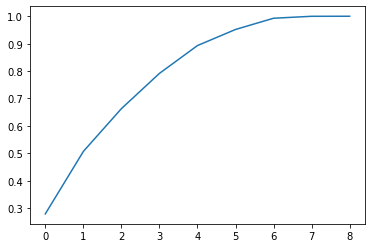

In [68]:
plt.plot(np.cumsum(var))
plt.show()

In [69]:
pca1=PCA(n_components=6)

In [71]:
pd.DataFrame(pca1.fit_transform(df_scaled),columns=["PC1","PC2","PC3","PC4","PC5","PC6"])

,PC1,PC2,PC3,PC4,PC5,PC6
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032
...,...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227,0.231162
210,-2.397652,3.108236,-1.117502,0.288454,0.624723,0.618056
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687,1.247320
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008,1.003352
